In [1]:
from helpers.vae import VAE
from helpers.train import train_online, train
from helpers.train import train_online_alternately
from helpers.convert_to_var_foo import convert_to_var

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.nn import functional as F

In [4]:
dim = 50
num_classes = 5

In [5]:
def get_one_hot_object(obj_class, dim, num_classes):
    x = np.zeros(dim)
    x[:(dim//num_classes) * (obj_class+1)] = 1
    return x

In [6]:
num_classes=5
num_steps = 1000
np.random.seed(11)
schedule = [np.random.randint(num_classes) for i in range(num_steps)]

In [7]:
X_train = []
X_test = []
num_per_class = 250
for i in range(num_classes):
    X_test.append(get_one_hot_object(i, dim, num_classes))
    for j in range(num_per_class):
        X_train.append(get_one_hot_object(i,
                                          dim, num_classes))
X_train = np.array(X_train)
X_test = np.array(X_test)

0.282
CPU times: user 2min 37s, sys: 472 ms, total: 2min 38s
Wall time: 1min


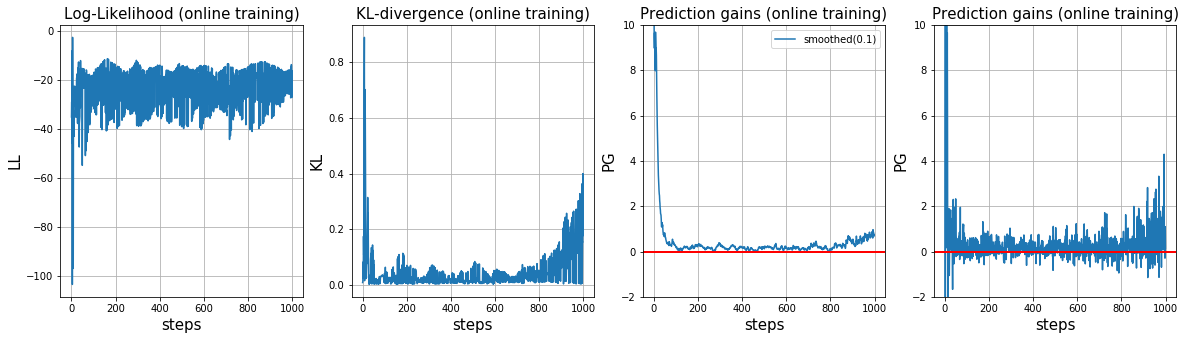

In [21]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)

0.304
CPU times: user 2min 45s, sys: 704 ms, total: 2min 46s
Wall time: 1min 5s


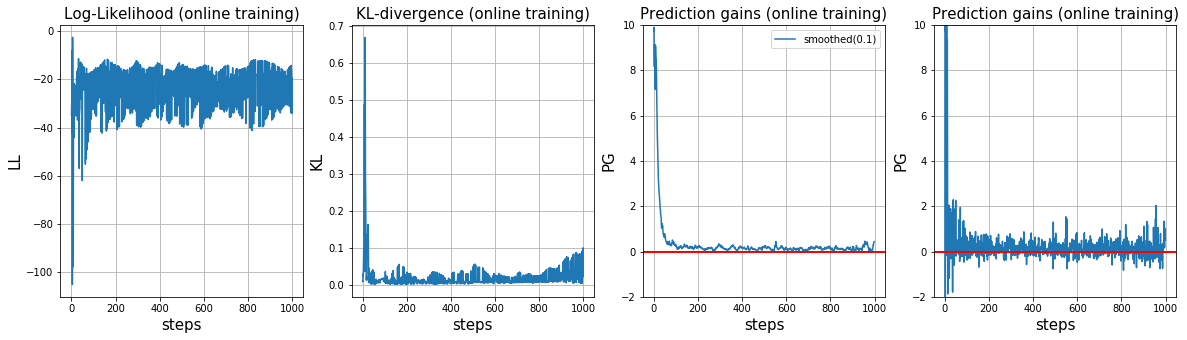

In [22]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1e-3, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)

0.085
CPU times: user 2min 38s, sys: 380 ms, total: 2min 39s
Wall time: 1min


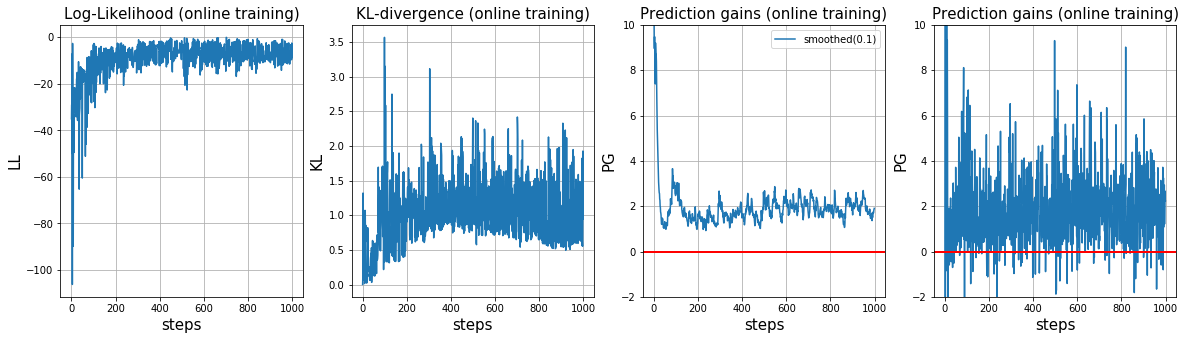

In [20]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1e-5, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)

0.065
CPU times: user 2min 49s, sys: 740 ms, total: 2min 50s
Wall time: 1min 7s


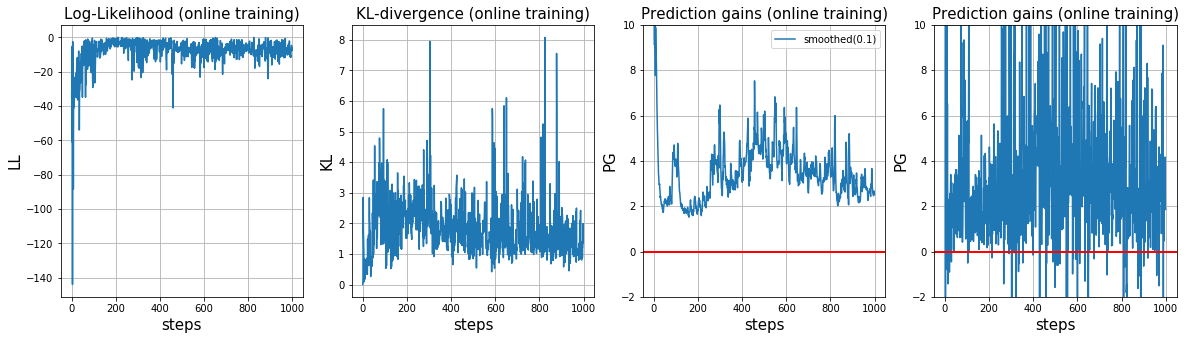

In [23]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1e-6, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)